In [97]:
# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install xgboost

In [147]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

### Import data

In [504]:
# file_path = './input/iridata_with_speed.csv'
# file_path = './input/0-1.csv'
file_path = './input/iridata_total_acceleration.csv'

data = pd.read_csv(file_path)
data.head()
# len(head)

,romdasSpikes,calcSpikesY,calcSpikesX,calcSpikesZ,calcSpikesAll,iri,meanY,sdY,meanX,sdX,meanZ,sdZ,romLog,iroadLog,speed,gpsSpeed
0,1214.0,1,0,34,35,3.95,0.043729,0.034808,7.520974e-08,9.761963e-08,0.042292,0.040095,3.084219,0.000000,27.424400,26.498853
1,1403.0,6,0,38,44,4.17,0.059806,0.046438,6.564512e-08,5.257175e-08,0.060579,0.066319,3.147058,0.778151,36.591900,38.132481
2,1268.0,4,0,63,67,4.02,0.061239,0.054922,9.582376e-08,8.717780e-08,0.133644,0.114854,3.103119,0.602060,40.742950,42.594704
3,943.0,4,0,56,60,3.64,0.053995,0.043564,7.951095e-08,7.161314e-08,0.104014,0.088790,2.974512,0.602060,43.009690,42.547606
4,1715.0,57,0,377,434,4.54,0.081963,0.057990,1.063748e-07,1.450462e-07,0.108971,0.075524,3.234264,1.755875,6.030806,7.398377


In [505]:
data.corr()

,romdasSpikes,calcSpikesY,calcSpikesX,calcSpikesZ,calcSpikesAll,iri,meanY,sdY,meanX,sdX,meanZ,sdZ,romLog,iroadLog,speed,gpsSpeed
romdasSpikes,1.000000,0.744499,0.358033,0.321610,0.535830,0.987004,0.386702,0.401102,0.031431,0.052960,0.081714,0.126343,0.964988,0.677756,-0.604284,-0.531140
calcSpikesY,0.744499,1.000000,0.381971,0.394407,0.654946,0.726256,0.604203,0.592016,0.031706,0.054535,0.181823,0.200829,0.695222,0.855958,-0.437196,-0.309290
calcSpikesX,0.358033,0.381971,1.000000,-0.303632,0.075555,0.357458,-0.036523,-0.025248,0.756077,0.775044,-0.522381,-0.492147,0.287183,0.242746,-0.431138,-0.350904
calcSpikesZ,0.321610,0.394407,-0.303632,1.000000,0.919271,0.305974,0.086586,0.109728,-0.474902,-0.464355,0.447078,0.435138,0.338612,0.339225,-0.359449,-0.288298
calcSpikesAll,0.535830,0.654946,0.075555,0.919271,1.000000,0.517825,0.173410,0.196495,-0.217751,-0.198304,0.297168,0.298119,0.522452,0.537150,-0.540976,-0.428380
iri,0.987004,0.726256,0.357458,0.305974,0.517825,1.000000,0.376326,0.390612,0.049946,0.068927,0.063165,0.108079,0.953405,0.660230,-0.612681,-0.546939
meanY,0.386702,0.604203,-0.036523,0.086586,0.173410,0.376326,1.000000,0.908147,-0.150638,-0.145543,0.468616,0.458889,0.395079,0.689899,0.198218,0.279544
sdY,0.401102,0.592016,-0.025248,0.109728,0.196495,0.390612,0.908147,1.000000,-0.155130,-0.147400,0.456900,0.460729,0.412191,0.713300,0.118288,0.192912
meanX,0.031431,0.031706,0.756077,-0.474902,-0.217751,0.049946,-0.150638,-0.155130,1.000000,0.987698,-0.763469,-0.726283,-0.020287,-0.045802,-0.215664,-0.177275
sdX,0.052960,0.054535,0.775044,-0.464355,-0.198304,0.068927,-0.145543,-0.147400,0.987698,1.000000,-0.752607,-0.715098,0.001864,-0.023518,-0.241784,-0.201916


Text(0.5,1,'IRI and Acceleration Data Correlations')

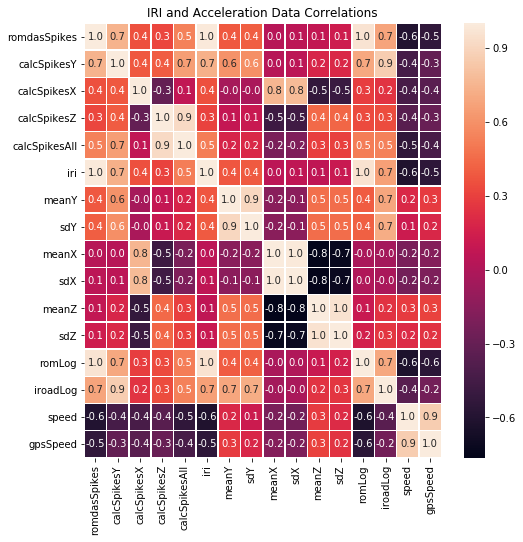

In [506]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('IRI and Acceleration Data Correlations')

In [507]:
# data = data.dropna(axis=0)
y = data.iri
y.head()

0    3.95
1    4.17
2    4.02
3    3.64
4    4.54
Name: iri, dtype: float64

In [508]:
data.columns

Index(['romdasSpikes', 'calcSpikesY', 'calcSpikesX', 'calcSpikesZ',
       'calcSpikesAll', 'iri', 'meanY', 'sdY', 'meanX', 'sdX', 'meanZ', 'sdZ',
       'romLog', 'iroadLog', 'speed', 'gpsSpeed'],
      dtype='object')

In [509]:
features = ['calcSpikesY', 'gpsSpeed']
X = data[features]
X.head()

,calcSpikesY,gpsSpeed
0,1,26.498853
1,6,38.132481
2,4,42.594704
3,4,42.547606
4,57,7.398377


In [510]:

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state=0)

### Parameter tunning

In [511]:
model = RandomForestRegressor()
parameters = [{'max_depth' : [1,2,3,4,5,6,10,20], 'n_estimators' : [1,2,3,4,5,10,20,30,40,50,60,70,80,100],
               'min_samples_leaf' : [0.01,0.02,0.03,0.005], 'random_state': [1,2,3,4,5,6,7,8,9,10]}]
grid = GridSearchCV(model,parameters,cv=3)

### Train model new

In [512]:
grid.fit(train_X, train_y)
model = grid.best_estimator_
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=0.02, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [514]:
model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=0.02, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

### Train using old model

In [490]:
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=0.03, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
           oob_score=False, random_state=8, verbose=0, warm_start=False)
model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=0.03, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
           oob_score=False, random_state=8, verbose=0, warm_start=False)

### Predict using model

In [515]:
val_predictions = model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))
# 0.356505207610224

0.35289764259289025


In [516]:
prediction = pd.DataFrame({'actual': val_y,'predicted': val_predictions})
prediction.corr()

,actual,predicted
actual,1.00000,0.78984
predicted,0.78984,1.00000


### Visualize prediction

In [518]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
# https://plot.ly/~aminda/5/
# https://plot.ly/~aminda/7/ 
# https://plot.ly/~aminda/9/
iplot([go.Scatter(x=list(range(len(val_predictions))), y=val_y, mode='lines', name = "actual"),
      go.Scatter(x=list(range(len(val_predictions))), y=val_predictions, mode='lines', name = "predicted")])

In [519]:
iplot([go.Scatter(x=val_predictions, y=val_y, mode='markers')])
# https://plot.ly/~aminda/3/

### Cross validation

In [520]:
cross_validation_scores = cross_val_score(model, val_X,val_y)
cross_validation_scores

array([0.58494205, 0.58920502, 0.70667888])

In [521]:
print("Mean of cross validation scores: ")
np.mean(cross_validation_scores)

Mean of cross validation scores: 


0.6269419834279609

In [522]:
cross_validation_scores = cross_val_score(model, val_X,val_y, cv=30 )
cross_validation_scores

array([  0.82469618,   0.76015223,   0.43701108,   0.37896844,
        -0.11769296,  -1.19349628, -16.27381047,  -0.8093101 ,
        -0.17933292,  -1.27904729,   0.39626712,   0.1466747 ,
         0.82668865,   0.78307707,  -2.22393601,   0.52671529,
         0.91163761,   0.78041925,  -6.47364658,   0.56262637,
         0.62991812,  -0.8489797 ,   0.94985393,   0.93231978,
         0.4908074 ,  -3.76467028,  -3.59513018,   0.26534593,
         0.86056535,  -4.65632381])

In [523]:
print("Mean of cross validation scores: ")
np.mean(cross_validation_scores)

Mean of cross validation scores: 


-0.9983877358950803

In [524]:
cross_validation_scores = cross_val_score(model,val_X,val_y, cv=20 )
cross_validation_scores

array([ 0.69119628,  0.24205497, -0.46107312,  0.21992455, -0.37006697,
       -3.7383395 ,  0.21535056,  0.32124875,  0.08873528,  0.60373058,
       -0.01655367,  0.85622854,  0.8844559 ,  0.3489197 ,  0.86032016,
        0.89963452, -4.01721968, -0.18912495,  0.03923528, -4.22796935])

In [525]:
print("Mean of cross validation scores: ")
np.mean(cross_validation_scores)

Mean of cross validation scores: 


-0.3374656086906257

In [526]:
cross_validation_scores = cross_val_score(model, val_X,val_y, cv=10 )
cross_validation_scores

array([ 0.79644729,  0.28419943, -1.16887792, -0.21999809,  0.22424095,
        0.48157009,  0.76867537,  0.73989642,  0.0785878 ,  0.71540181])

In [527]:
print("Mean of cross validation scores: ")
np.mean(cross_validation_scores)

Mean of cross validation scores: 


0.2700143131994226